In [69]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import utilities as u
import preprocessing as pp
import single_session_plots as ssp
import numpy as np
import SimilarityMatrixAnalysis as sm
import PlaceCellAnalysis as pc
import scipy as sp
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

ops = {'behavior':False,
    'PCA':False,
    'place cells':True,
    'trial simmats':True,
    'trial NMF':False,
    'savefigs':True}

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [75]:
mouse = '4222157.4'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

MouseName  DateFolder  SessionNumber               Track  RewardCount  \
1999  4222157.4  04_06_2019              0  FreqMorph_Decision          100   
2030  4222157.4  06_06_2019              1  FreqMorph_Decision           99   
2054  4222157.4  08_06_2019              2   FreqMorph_Timeout           52   
2079  4222157.4  11_06_2019              1   FreqMorph_Timeout           71   
2101  4222157.4  13_06_2019              1   FreqMorph_Timeout           76   
2114  4222157.4  14_06_2019              2   FreqMorph_Timeout           66   
2128  4222157.4  15_06_2019              1   FreqMorph_Timeout           70   
2137  4222157.4  17_06_2019              1   FreqMorph_Timeout           78   
2155  4222157.4  18_06_2019              1   FreqMorph_Timeout           87   
2166  4222157.4  19_06_2019              1   FreqMorph_Timeout           85   
2198  4222157.4  23_06_2019              1    TwoTower_Timeout           84   
2212  4222157.4  25_06_2019              1    TwoTower_Timeout          104   

      Imaging ImagingRegion   DateTime  \
1999        1           CA1 2019-06-04   
2030        1           CA1 2019-06-06   
2054        1           CA1 2019-06-08   
2079        1           CA1 2019-06-11   
2101        1           CA1 2019-06-13   
2114        1           CA1 2019-06-14   
2128        1           CA1 2019-06-15   
2137        1           CA1 2019-06-17   
2155        1           CA1 2019-06-18   
2166        1           CA1 2019-06-19   
2198        1           CA1 2019-06-23   
2212        1           CA1 2019-06-25   

                                              data file scanfile  \
1999  G:\My Drive\VR_Data\TwoTower\4222157.4\04_06_2...     None   
2030  G:\My Drive\VR_Data\TwoTower\4222157.4\06_06_2...     None   
2054  G:\My Drive\VR_Data\TwoTower\4222157.4\08_06_2...     None   
2079  G:\My Drive\VR_Data\TwoTower\4222157.4\11_06_2...     None   
2101  G:\My Drive\VR_Data\TwoTower\4222157.4\13_06_2...     None   
2114  G:\My Drive\VR_Data\TwoTower\4222157.4\14_06_2...     None   
2128  G:\My Drive\VR_Data\TwoTower\4222157.4\15_06_2...     None   
2137  G:\My Drive\VR_Data\TwoTower\4222157.4\17_06_2...     None   
2155  G:\My Drive\VR_Data\TwoTower\4222157.4\18_06_2...     None   
2166  G:\My Drive\VR_Data\TwoTower\4222157.4\19_06_2...     None   
2198  G:\My Drive\VR_Data\TwoTower\4222157.4\23_06_2...     None   
2212  G:\My Drive\VR_Data\TwoTower\4222157.4\25_06_2...     None   

                                                scanmat  \
1999  G:\My Drive\2P_Data\TwoTower\4222157.4\04_06_2...   
2030  G:\My Drive\2P_Data\TwoTower\4222157.4\06_06_2...   
2054  G:\My Drive\2P_Data\TwoTower\4222157.4\08_06_2...   
2079  G:\My Drive\2P_Data\TwoTower\4222157.4\11_06_2...   
2101  G:\My Drive\2P_Data\TwoTower\4222157.4\13_06_2...   
2114  G:\My Drive\2P_Data\TwoTower\4222157.4\14_06_2...   
2128  G:\My Drive\2P_Data\TwoTower\4222157.4\15_06_2...   
2137  G:\My Drive\2P_Data\TwoTower\4222157.4\17_06_2...   
2155  G:\My Drive\2P_Data\TwoTower\4222157.4\18_06_2...   
2166  G:\My Drive\2P_Data\TwoTower\4222157.4\19_06_2...   
2198  G:\My Drive\2P_Data\TwoTower\4222157.4\23_06_2...   
2212  G:\My Drive\2P_Data\TwoTower\4222157.4\25_06_2...   

                                              s2pfolder  
1999  G:\My Drive\2P_Data\TwoTower\4222157.4\04_06_2...  
2030  G:\My Drive\2P_Data\TwoTower\4222157.4\06_06_2...  
2054  G:\My Drive\2P_Data\TwoTower\4222157.4\08_06_2...  
2079  G:\My Drive\2P_Data\TwoTower\4222157.4\11_06_2...  
2101  G:\My Drive\2P_Data\TwoTower\4222157.4\13_06_2...  
2114  G:\My Drive\2P_Data\TwoTower\4222157.4\14_06_2...  
2128  G:\My Drive\2P_Data\TwoTower\4222157.4\15_06_2...  
2137  G:\My Drive\2P_Data\TwoTower\4222157.4\17_06_2...  
2155  G:\My Drive\2P_Data\TwoTower\4222157.4\18_06_2...  
2166  G:\My Drive\2P_Data\TwoTower\4222157.4\19_06_2...  
2198  G:\My Drive\2P_Data\TwoTower\4222157.4\23_06_2...  
2212  G:\My Drive\2P_Data\TwoTower\4222157.4\25_06_2...

failed to make path G:\My Drive\Figures\TwoTower\SingleSession\4222157.4\FreqMorph_Timeout_19_06_2019_1
num aberrant ttls 0.0
22270 (22270,) (22270, 21) 63586
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:324: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:325: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


start bootstrap
end bootstrap


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:109: RuntimeWarning: Mean of empty slice
  frmap[i] = np.nanmean(C[(position>edge1) & (position<=edge2),:],axis=0)


start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
morph 0 place cells = 779 out of 1472 , 0.529212 
morph 1 place cells = 670 out of 1472, 0.455163
(1472, 45) (45, 1472)
(1472, 90) (45, 1472)
(1472, 135) (45, 1472)
(1472, 180) (45, 1472)
3.945537846095795
4.525835879916097
3.982397133680573
3.319017793812188
2.91760457237699
2.0557275056294273
2.527080492678635
2.9399724832238667
2.4230452963956295
2.480355991022815
3.371377205530212
3.3853365622041767
3.5252043792385197
3.4529136661383784
3.454502408668548
3.5530658848730274


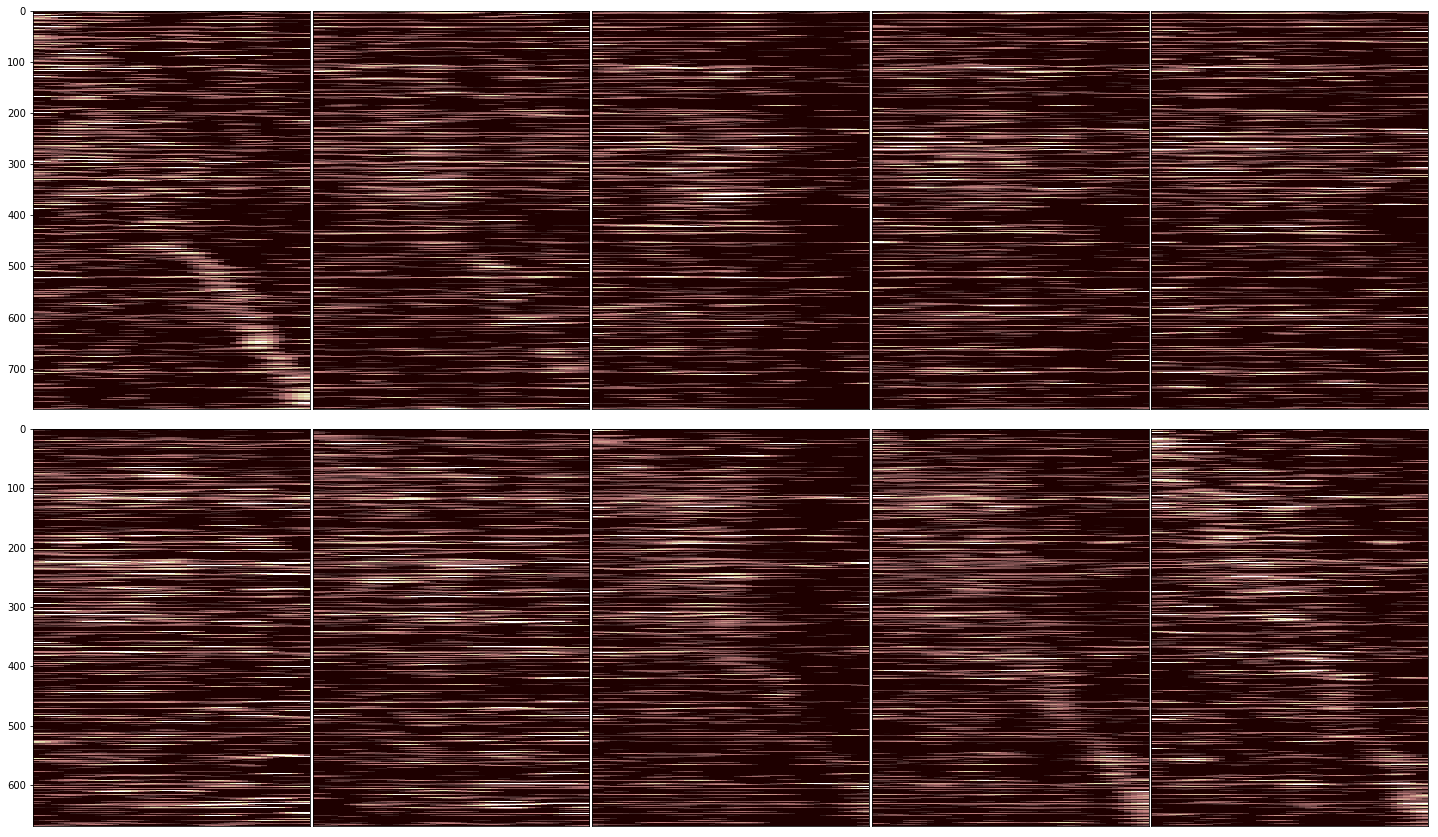

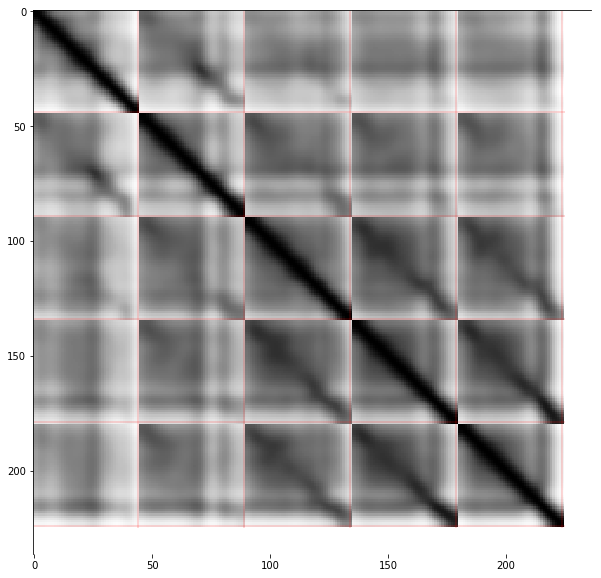

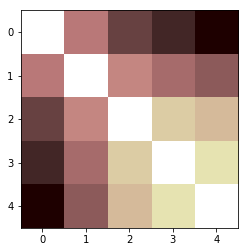

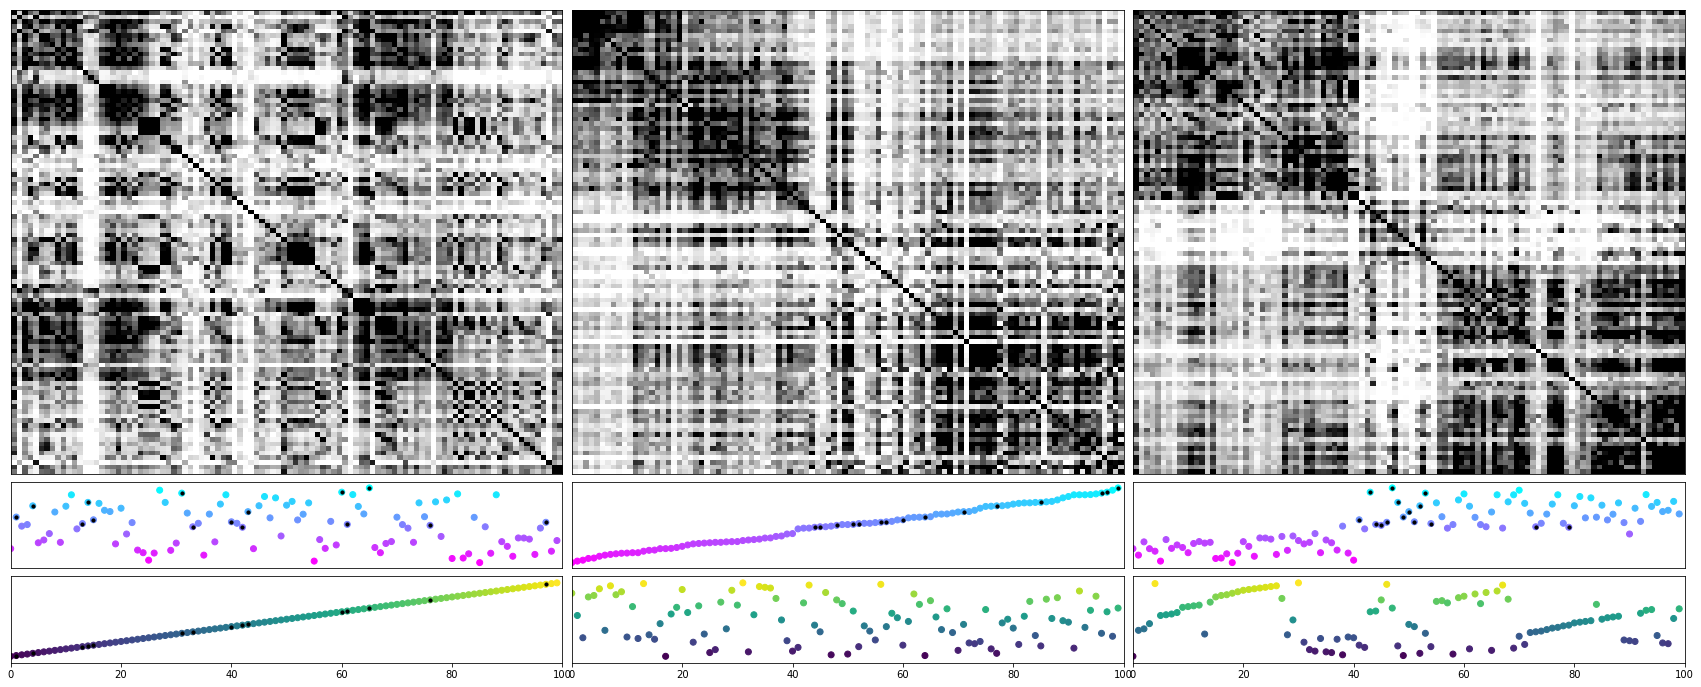

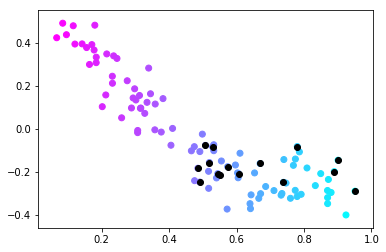

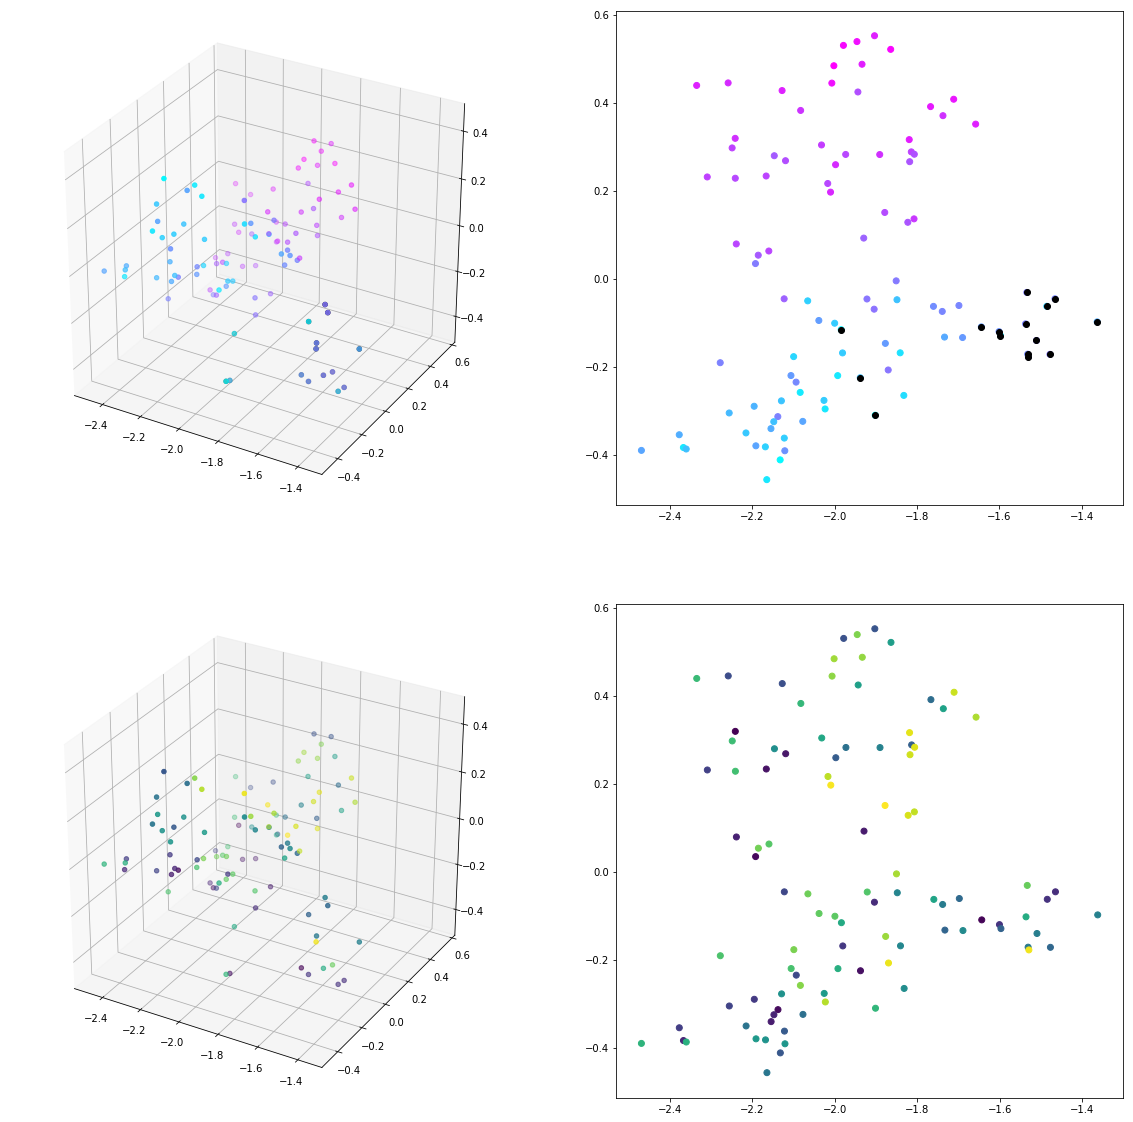

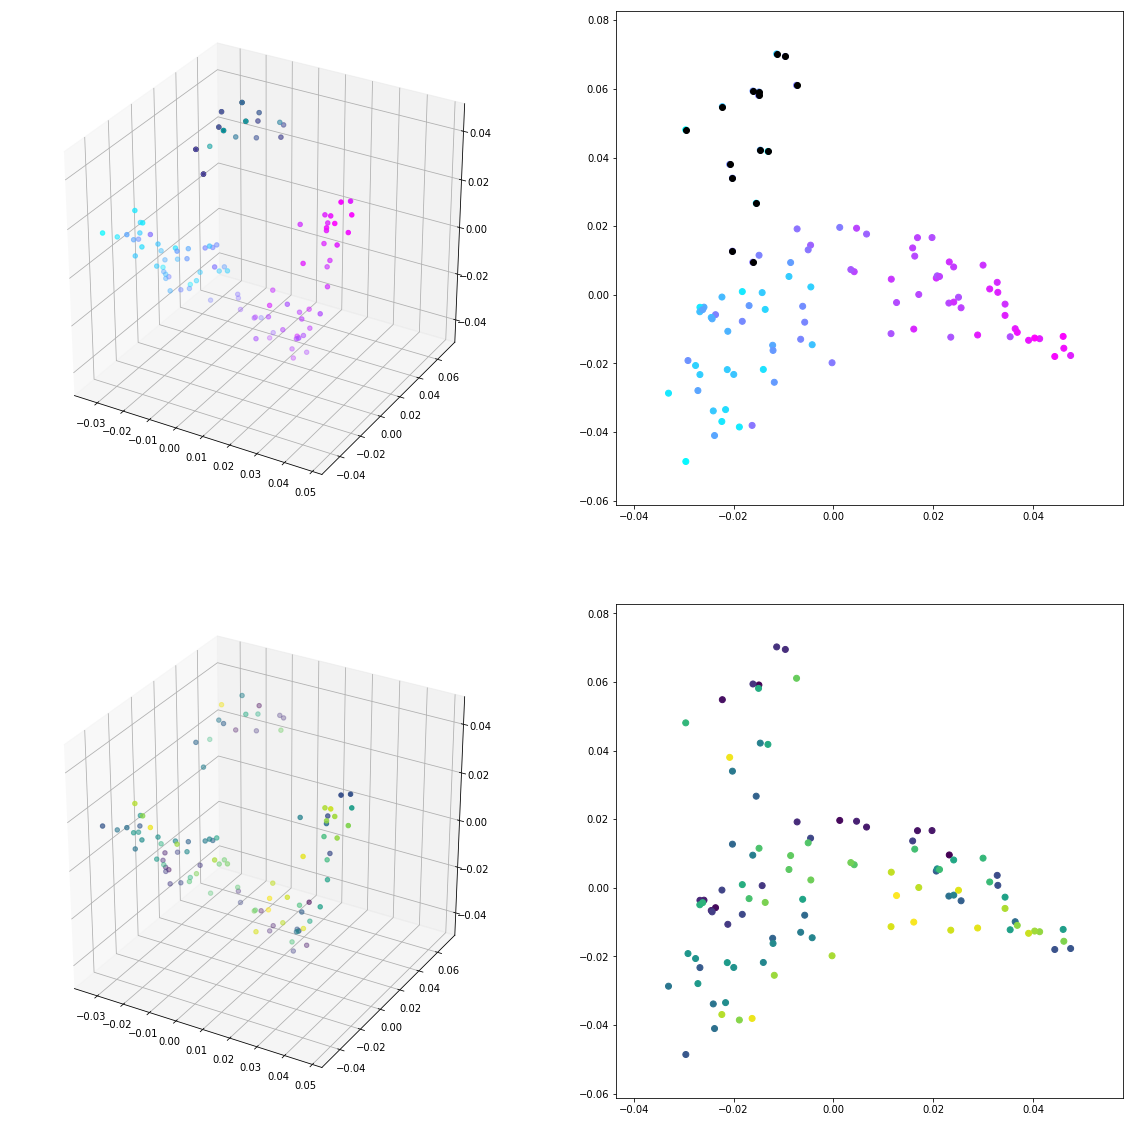

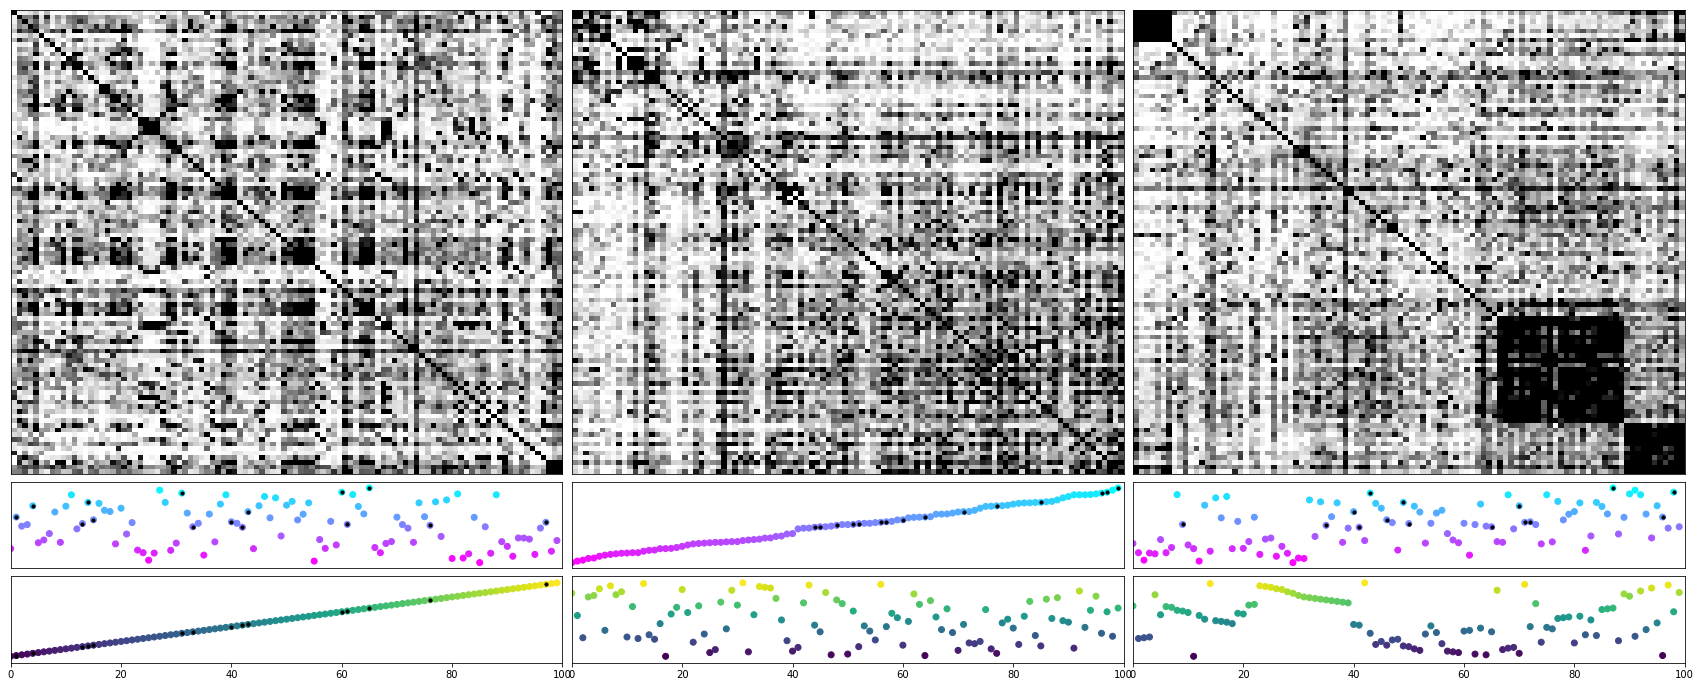

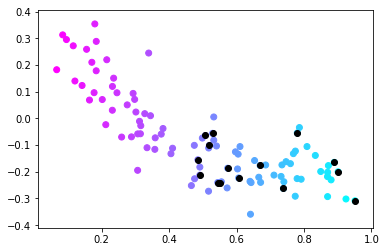

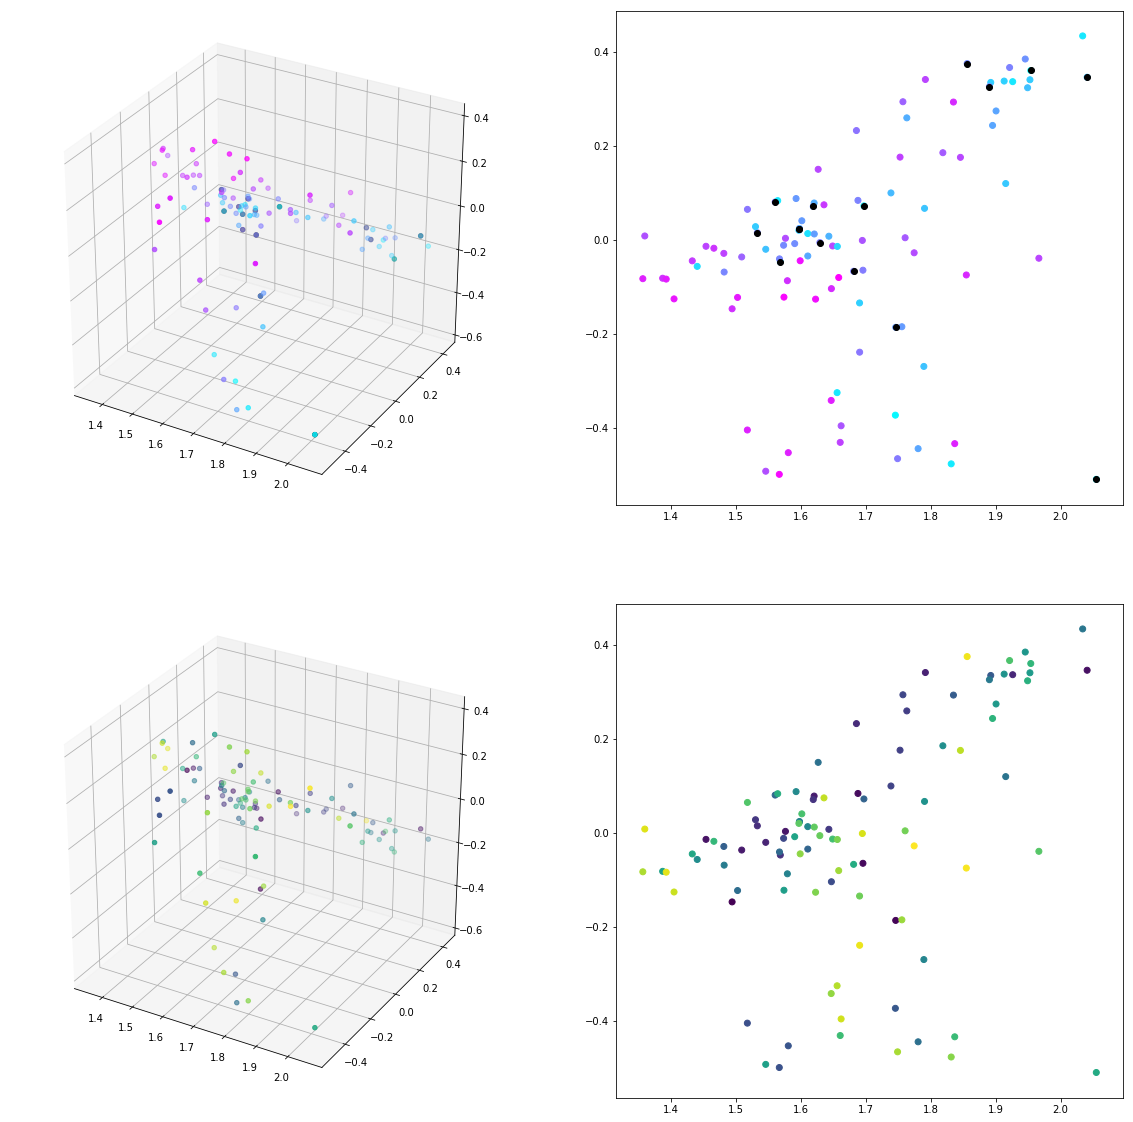

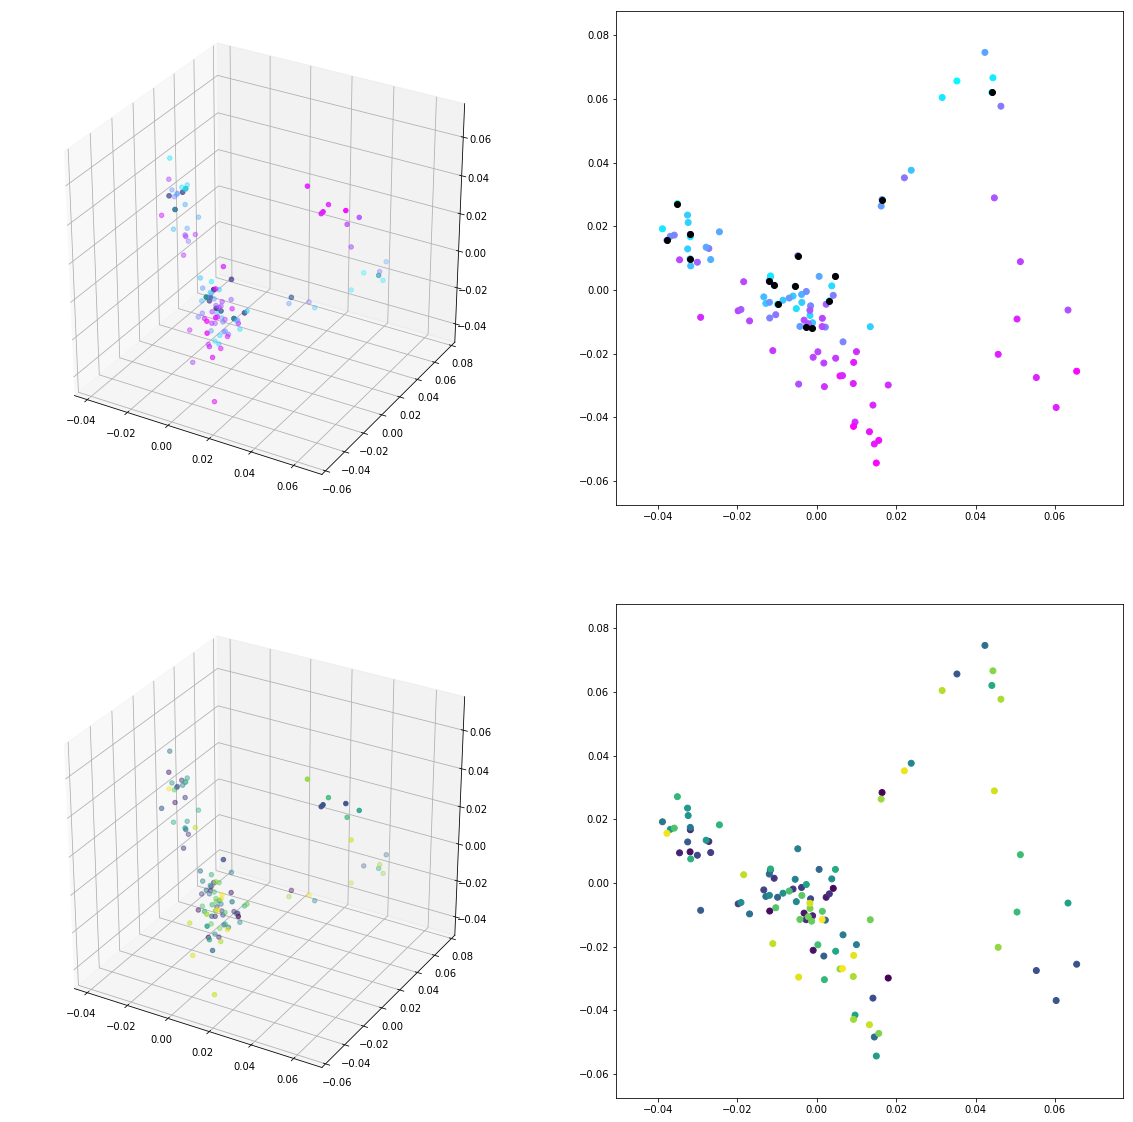

In [77]:
sess=df_mouse.iloc[-3]
ssp.single_session_figs(sess,ops=ops)